<a href="https://colab.research.google.com/github/mohnishsachdeva/ANN-image_classification/blob/main/Artificial_Neural_Network_%E2%80%93Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
import keras

In [2]:
#Mount Google drive to save model
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the dataset
Load the training and testing MNIST images into the variables X_train and X_test, with y_train and y_test used to hold the matching digits. Keep in mind that the shape of every image in the MNIST dataset is 28 x 28 pixels.

In [3]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Reshape the inputs (X_train and X_test) to a shape that can be an input for the ANN model. The Keras reshape function takes as arguments the number of images (60,000 for X_train and 10,000 for X_test), the shape of each image (28×28), and the number of color channels – 1 in this case because images are greyscale.

Then, one-hot-encode the target variable, mapping a variable to each target label – in our case, ‘0’, ‘1’, ‘2’, etc. because we are recognizing digits.

In [4]:
#from keras import utils as np_utils
from keras.utils import np_utils
batch_size = 128
num_classes = 10
epochs = 25
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize to 0 to 1 range
X_train /= 255
X_test /= 255

print('Number of images in training Set: ', X_train.shape[0], )
print('Number of images in training Set: ', X_test.shape[0], )
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


print('Training set size:', X_train.shape)
print('Testing set size:', X_test.shape)
print('Training label size;',y_train.shape)
print('testing  label size;',y_test.shape)


Number of images in training Set:  60000
Number of images in training Set:  10000
Training set size: (60000, 784)
Testing set size: (10000, 784)
Training label size; (60000, 10)
testing  label size; (10000, 10)


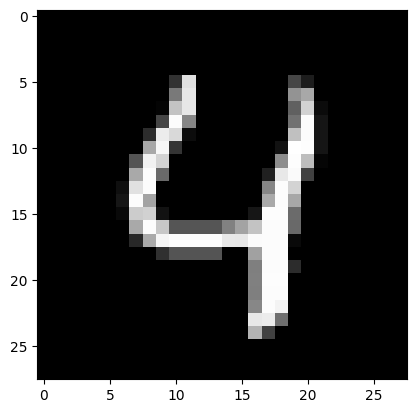

In [5]:

plt.imshow(X_test[4:5].reshape(28,28), cmap='gray')
plt.show()

In [6]:
print("Label:",y_test[4:5])

Label: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


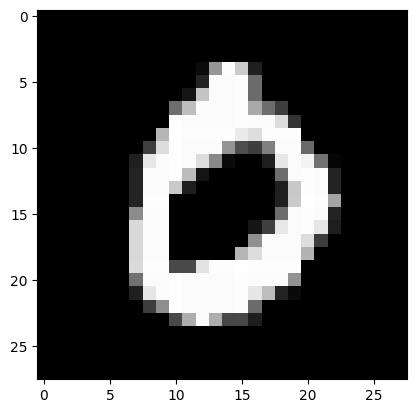

In [7]:
plt.imshow(X_test[3:4].reshape(28,28), cmap='gray')
plt.show()

In [8]:
print("Label:",y_test[3:4])

Label: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
# NN Model structure
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


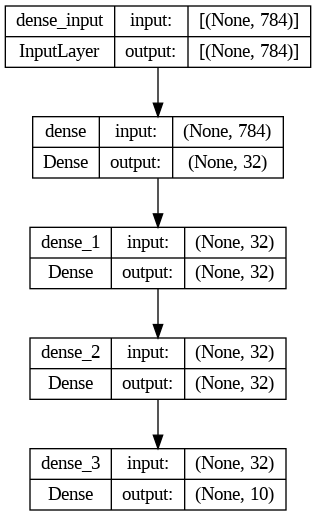

In [10]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

In [13]:
#Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=["accuracy"])

In [14]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2)

Epoch 1/25
469/469 - 7s - loss: 1.6400 - accuracy: 0.4961 - 7s/epoch - 14ms/step
Epoch 2/25
469/469 - 1s - loss: 0.7177 - accuracy: 0.8138 - 1s/epoch - 3ms/step
Epoch 3/25
469/469 - 1s - loss: 0.4202 - accuracy: 0.8904 - 1s/epoch - 3ms/step
Epoch 4/25
469/469 - 1s - loss: 0.3117 - accuracy: 0.9146 - 1s/epoch - 3ms/step
Epoch 5/25
469/469 - 1s - loss: 0.2524 - accuracy: 0.9301 - 1s/epoch - 3ms/step
Epoch 6/25
469/469 - 1s - loss: 0.2155 - accuracy: 0.9398 - 1s/epoch - 3ms/step
Epoch 7/25
469/469 - 1s - loss: 0.1899 - accuracy: 0.9465 - 1s/epoch - 3ms/step
Epoch 8/25
469/469 - 2s - loss: 0.1715 - accuracy: 0.9516 - 2s/epoch - 4ms/step
Epoch 9/25
469/469 - 2s - loss: 0.1574 - accuracy: 0.9556 - 2s/epoch - 4ms/step
Epoch 10/25
469/469 - 1s - loss: 0.1461 - accuracy: 0.9586 - 1s/epoch - 3ms/step
Epoch 11/25
469/469 - 1s - loss: 0.1363 - accuracy: 0.9614 - 1s/epoch - 3ms/step
Epoch 12/25
469/469 - 1s - loss: 0.1285 - accuracy: 0.9636 - 1s/epoch - 3ms/step
Epoch 13/25
469/469 - 1s - loss: 0.1

In [15]:
# save model and architecture to single file
model.save('/content/drive/My Drive/FDP/MNISTANN.h5')
model.summary()

print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Saved model to disk


In [16]:
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/FDP/MNISTANN.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy'])


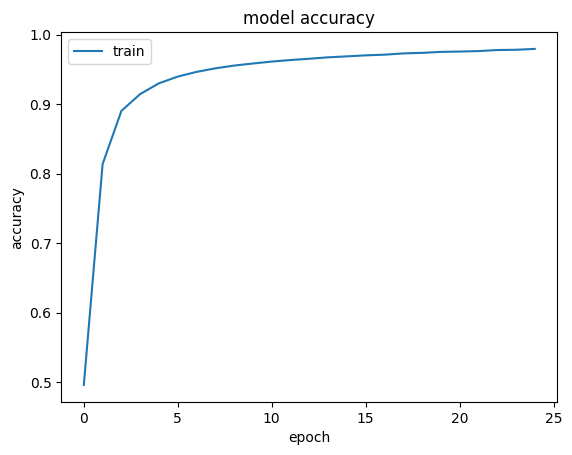

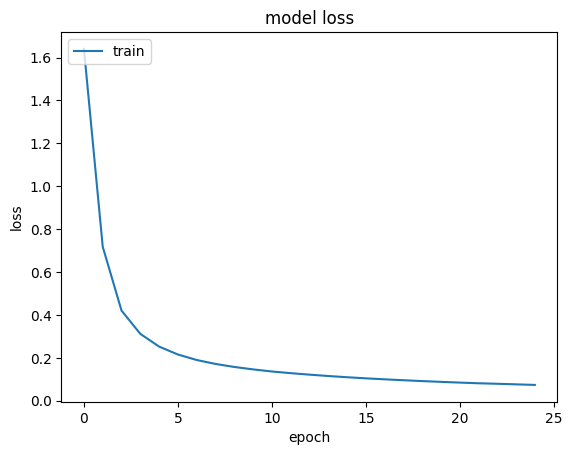

In [17]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
313/313 [==============================] - 1s 2ms/step - loss: 0.1274 - accuracy: 0.9639
Test Accuracy: 96.39000296592712


In [19]:
#Trainig accuracy
y_pred=model.predict(X_train)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred.shape)

1875/1875 [==============================] - 3s 2ms/step
[5 0 4 ... 5 6 8]
(60000,)


In [20]:
# Original Training  label
y_train_original=np.argmax(y_train,axis=1)
print(y_train_original)

[5 0 4 ... 5 6 8]


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_train_original, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_train_original, y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.98      0.98      0.98      5958
           3       0.99      0.97      0.98      6131
           4       0.97      0.98      0.98      5842
           5       0.98      0.97      0.98      5421
           6       0.99      0.99      0.99      5918
           7       0.98      0.99      0.98      6265
           8       0.98      0.98      0.98      5851
           9       0.98      0.97      0.97      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000

Confusion matrix 
[[5856    0    4    0   11   11   15    2   12   12]
 [   1 6683   23    6    2    1    1    8    9    8]
 [  10   14 5868   14    9    3    6   15   16    3]
 [   2   10   42 5962    1   34    2   34

In [22]:
# testing accuracy
y_pred=model.predict(X_test)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred.shape)

313/313 [==============================] - 1s 4ms/step
[7 2 1 ... 4 5 6]
(10000,)


In [23]:
# Original testing Label
y_test_original=np.argmax(y_test,axis=1)
y_test_original

array([7, 2, 1, ..., 4, 5, 6])

In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_test_original, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_test_original, y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.97      0.99      0.98      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.96      0.93      0.95       892
           6       0.97      0.97      0.97       958
           7       0.96      0.97      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion matrix 
[[ 958    0    2    1    4    2    7    2    2    2]
 [   0 1120    7    1    0    1    2    1    3    0]
 [   3    2 1004    6    1    1    5    7    3    0]
 [   1    2    6  977    0    5    1   10

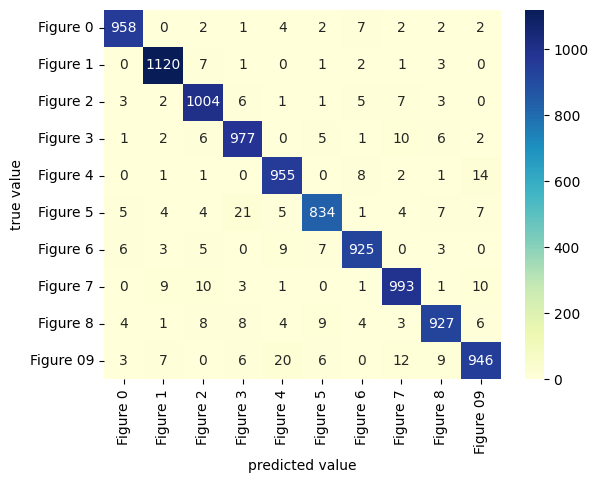

In [25]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_original,y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Figure 0','Figure 1','Figure 2','Figure 3','Figure 4','Figure 5','Figure 6','Figure 7','Figure 8','Figure 09'], 
            yticklabels=['Figure 0','Figure 1','Figure 2','Figure 3','Figure 4','Figure 5','Figure 6','Figure 7','Figure 8','Figure 09']); 

plt.xlabel('predicted value')
plt.ylabel('true value');

In [26]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1274312138557434
Test accuracy: 0.9639000296592712


Label: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


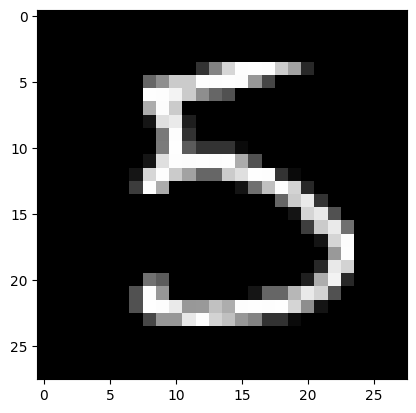

In [27]:
print("Label:",y_test[15:16])
plt.imshow(X_test[15:16].reshape(28,28), cmap='gray')
plt.show()

In [28]:
# Write the index of the test sample to test
prediction = model.predict(X_test[15:16])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 27ms/step
Prediction
 [4.65411404e-06 1.36289780e-03 1.65218862e-05 3.89239565e-02
 6.99281873e-06 9.59254622e-01 2.61014384e-06 3.76485114e-05
 3.79431236e-04 1.06714015e-05]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


In [29]:
from google.colab import files
uploaded = files.upload()

Saving img_1.jpg to img_1.jpg


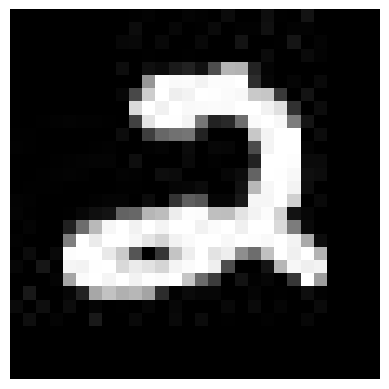

In [30]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('img_1.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

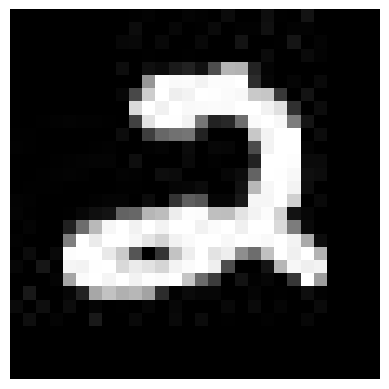

In [31]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('img_1.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [32]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 60ms/step
Prediction Score:
 [4.6619317e-07 3.0146783e-05 9.9982554e-01 2.6065245e-05 6.4705256e-07
 7.6013794e-06 5.6941011e-05 1.0916248e-06 5.1445892e-05 4.6097565e-10]

Thresholded Score:
 [0 0 1 0 0 0 0 0 0 0]

Predicted Digit: 2
